In [58]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [59]:
#importing data
from google.colab import files
uploaded = files.upload()

Saving 2005-2022-local-authority-ghg-emissions-csv-dataset.csv to 2005-2022-local-authority-ghg-emissions-csv-dataset (1).csv


In [60]:
df = pd.read_csv('2005-2022-local-authority-ghg-emissions-csv-dataset.csv')
df.head(5)

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.678178,1.678178,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.052700,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006770,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.311375,0.311375,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.010500,0.000000,90.457,98.3466


In [61]:
df.shape

(533016, 15)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533016 entries, 0 to 533015
Data columns (total 15 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Country                                                      533016 non-null  object 
 1   Country Code                                                 532602 non-null  object 
 2   Region                                                       533016 non-null  object 
 3   Region Code                                                  532602 non-null  object 
 4   Second Tier Authority                                        532602 non-null  object 
 5   Local Authority                                              533016 non-null  object 
 6   Local Authority Code                                         533016 non-null  object 
 7   Calendar Year                                                5330

In [63]:
df.describe()

,Calendar Year,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
count,533016.000000,533016.000000,533016.000000,532602.000000,532602.000000
mean,2013.485747,17.121331,12.005353,179.277772,693.698270
std,5.194708,96.961376,49.060174,121.127481,1738.087974
min,2005.000000,-2854.921188,0.000000,2.210000,3.149600
25%,2009.000000,0.039800,0.000000,102.717169,95.093000
50%,2013.000000,0.534011,0.000000,139.511000,269.239700
75%,2018.000000,5.268804,0.000000,225.234000,641.182900
max,2022.000000,10542.349240,4091.073264,1157.603000,26473.949600


In [64]:
df.isnull().sum()

,0
Country,0
Country Code,414
Region,0
Region Code,414
Second Tier Authority,414
Local Authority,0
Local Authority Code,0
Calendar Year,0
LA GHG Sector,0
LA GHG Sub-sector,0


In [65]:
df.Country.unique()

array(['England', 'Unallocated', 'Northern Ireland', 'Scotland', 'Wales'],
      dtype=object)

In [66]:
df = df[df["CO2 emissions within the scope of influence of LAs (kt CO2)"] != 0]


In [67]:
# Ensure correct filtering (again clearly)
yh_df = df[
    (df['Country'] == 'England') &
    (df['Region'] == 'Yorkshire and the Humber') &
    (df['Local Authority'] != 'Unallocated')
]


In [68]:
# Columns to drop
columns_to_drop = [
    'Country', 'Country Code', 'Region Code',
    'Second Tier Authority', 'Local Authority Code',
    'Greenhouse gas'
]

# Drop the unnecessary columns
df1 = yh_df.drop(columns=columns_to_drop)

# Check final cleaned dataframe structure
df1.info()
df1.head()


<class 'pandas.core.frame.DataFrame'>
Index: 5167 entries, 13482 to 388718
Data columns (total 9 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Region                                                       5167 non-null   object 
 1   Local Authority                                              5167 non-null   object 
 2   Calendar Year                                                5167 non-null   int64  
 3   LA GHG Sector                                                5167 non-null   object 
 4   LA GHG Sub-sector                                            5167 non-null   object 
 5   Territorial emissions (kt CO2e)                              5167 non-null   float64
 6   CO2 emissions within the scope of influence of LAs (kt CO2)  5167 non-null   float64
 7   Mid-year Population (thousands)                              5167 non-null   f

,Region,Local Authority,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
13482,Yorkshire and the Humber,"Kingston upon Hull, City of",2005,Agriculture,Agriculture Electricity,0.272135,0.272135,255.159,81.4974
13485,Yorkshire and the Humber,"Kingston upon Hull, City of",2005,Agriculture,Agriculture Gas,0.245342,0.245342,255.159,81.4974
13490,Yorkshire and the Humber,"Kingston upon Hull, City of",2005,Agriculture,Agriculture 'Other',0.362551,0.362551,255.159,81.4974
13495,Yorkshire and the Humber,"Kingston upon Hull, City of",2005,Commercial,Commercial Electricity,280.453103,280.453103,255.159,81.4974
13498,Yorkshire and the Humber,"Kingston upon Hull, City of",2005,Commercial,Commercial Gas,41.992481,41.992481,255.159,81.4974


In [69]:
df1.shape

(5167, 9)

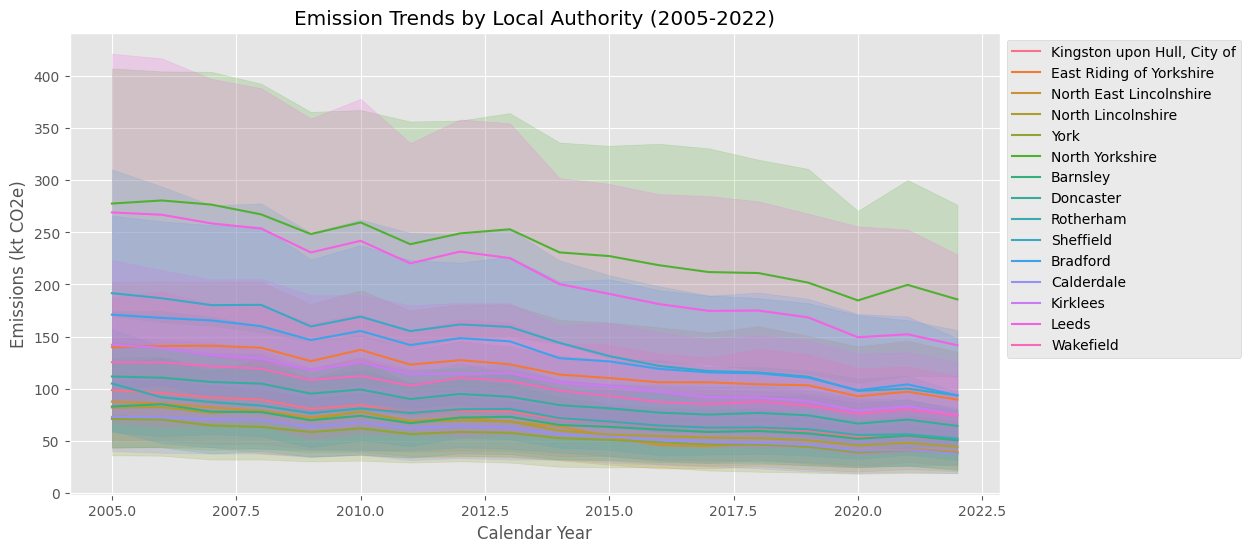

In [70]:
#  Understand trends, patterns, and differences in emissions across local authorities.

plt.figure(figsize=(12,6))
sns.lineplot(data=df1, x='Calendar Year', y='CO2 emissions within the scope of influence of LAs (kt CO2)', hue='Local Authority')
plt.title('Emission Trends by Local Authority (2005-2022)')
plt.ylabel('Emissions (kt CO2e)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()


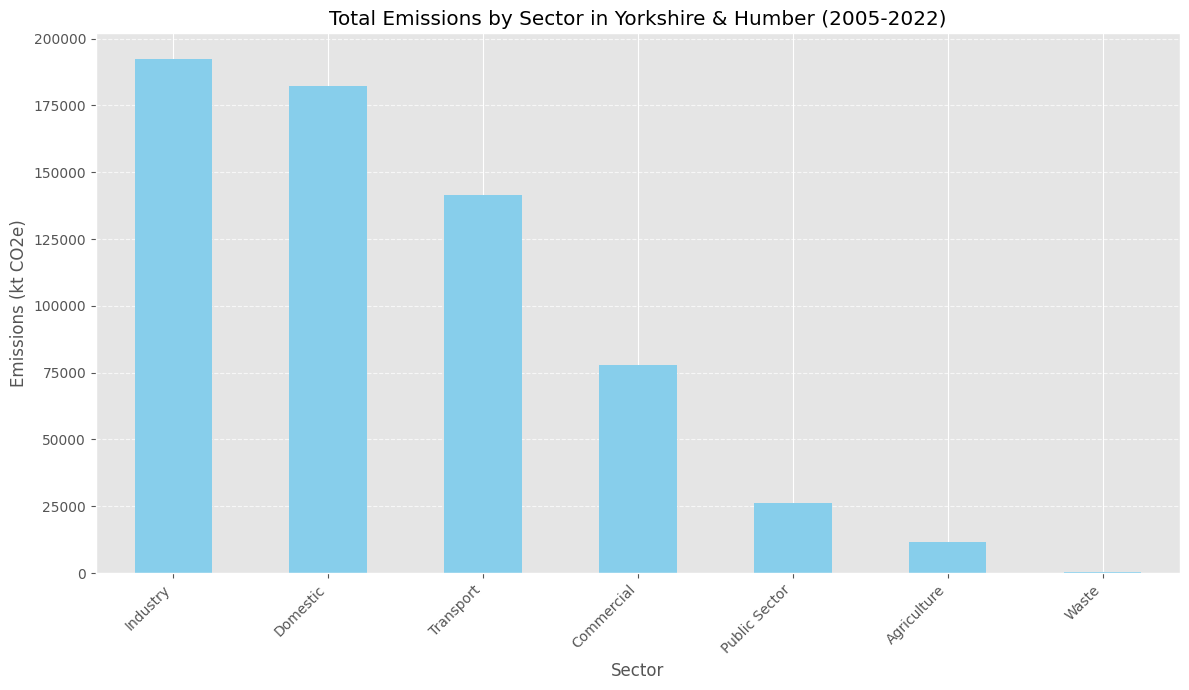

In [71]:
# Find out which sectors/sub-sectors contribute most significantly.
# Aggregate emissions by GHG sector
sector_emissions = df1.groupby('LA GHG Sector')['Territorial emissions (kt CO2e)']\
                      .sum().sort_values(ascending=False)

# Plot results
plt.figure(figsize=(12, 7))
sector_emissions.plot(kind='bar', color='skyblue')
plt.title('Total Emissions by Sector in Yorkshire & Humber (2005-2022)')
plt.ylabel('Emissions (kt CO2e)')
plt.xlabel('Sector')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


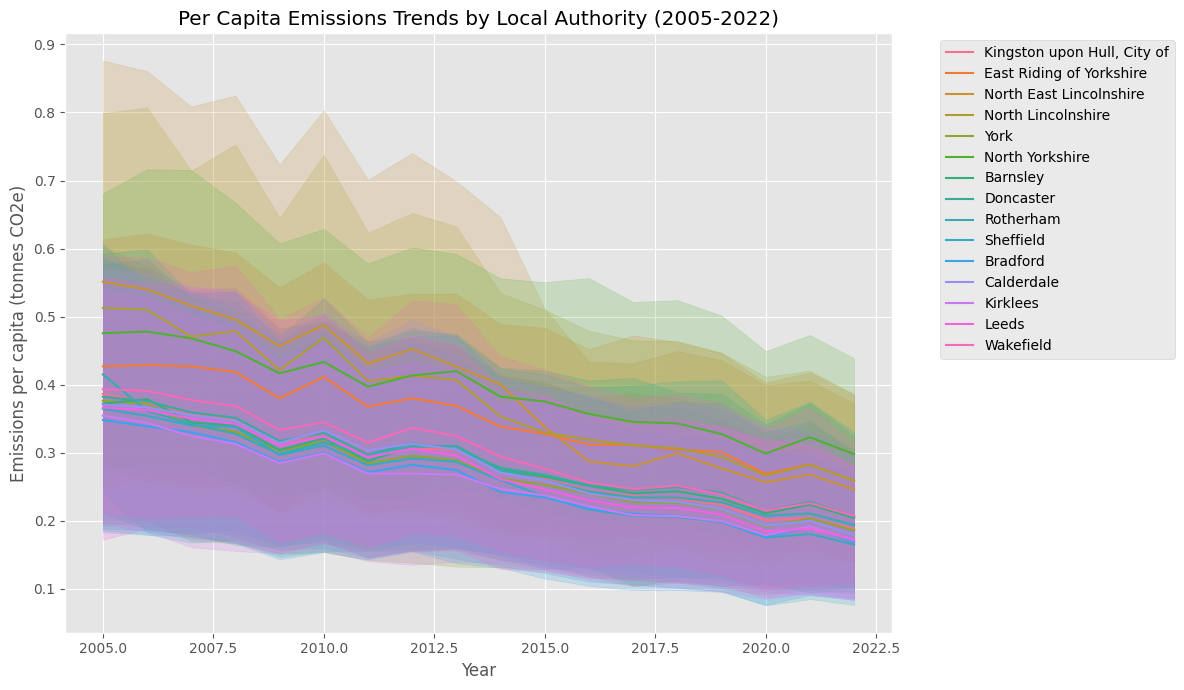

In [72]:
# Calculate per-capita emissions (tonnes CO2e per person)
df1['Emissions per capita (t CO2e)'] = (df1['CO2 emissions within the scope of influence of LAs (kt CO2)'] * 1000) / (df1['Mid-year Population (thousands)'] * 1000)

# Visualize per-capita emissions trends
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df1,
    x='Calendar Year',
    y='Emissions per capita (t CO2e)',
    hue='Local Authority'
)
plt.title('Per Capita Emissions Trends by Local Authority (2005-2022)')
plt.ylabel('Emissions per capita (tonnes CO2e)')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [73]:
from scipy.stats import zscore

# Compute Z-scores within each Local Authority
df1['z_score'] = df1.groupby('Local Authority')['CO2 emissions within the scope of influence of LAs (kt CO2)']\
                    .transform(lambda x: np.abs(zscore(x)))

# Identify outliers (commonly using threshold z > 3)
outliers_df = df1[df1['z_score'] > 3]

# Display outliers clearly
print(outliers_df[['Local Authority', 'Calendar Year', 'CO2 emissions within the scope of influence of LAs (kt CO2)', 'z_score']])


                Local Authority  Calendar Year  \
16480   North East Lincolnshire           2005   
16563   North East Lincolnshire           2006   
16646   North East Lincolnshire           2007   
16729   North East Lincolnshire           2008   
16813   North East Lincolnshire           2009   
...                         ...            ...   
384816                 Kirklees           2013   
385672                    Leeds           2005   
385758                    Leeds           2006   
386102                    Leeds           2010   
387207                Wakefield           2005   

        CO2 emissions within the scope of influence of LAs (kt CO2)   z_score  
16480                                          450.963694            4.623934  
16563                                          456.919020            4.694704  
16646                                          420.734251            4.264706  
16729                                          417.125351            4.221820  

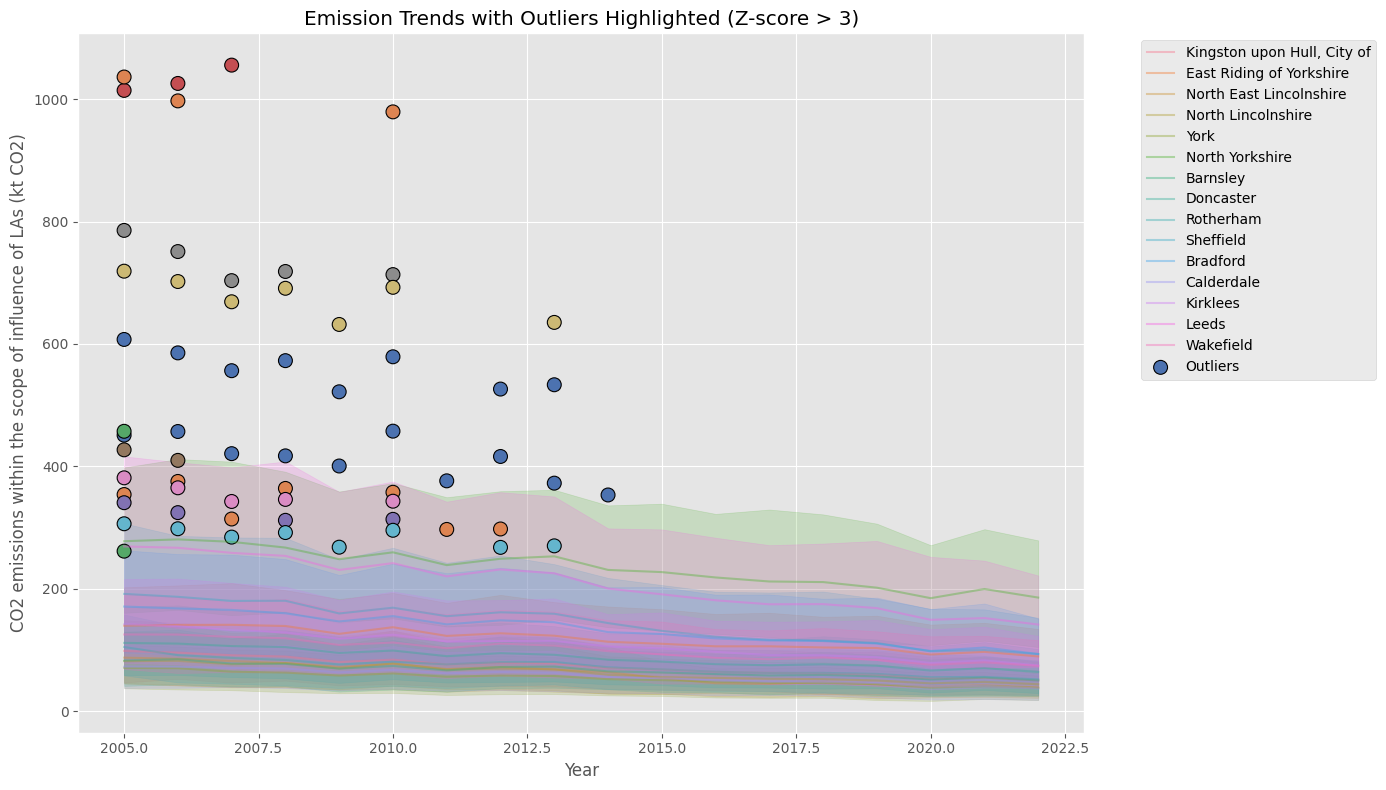

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for outliers (Z-score > 3)
outliers = df1[df1['z_score'] > 3]

# Plot each Local Authority's emissions
plt.figure(figsize=(14, 8))
sns.lineplot(data=df1, x='Calendar Year', y='CO2 emissions within the scope of influence of LAs (kt CO2)', hue='Local Authority', alpha=0.4)

# Overlay outliers as red points
sns.scatterplot(
    data=outliers,
    x='Calendar Year',
    y='CO2 emissions within the scope of influence of LAs (kt CO2)',
    hue='Local Authority',
    palette='deep',
    marker='o',
    edgecolor='black',
    s=100,
    legend=False,
    label='Outliers'
)

plt.title('Emission Trends with Outliers Highlighted (Z-score > 3)')
plt.ylabel('CO2 emissions within the scope of influence of LAs (kt CO2)')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
!pip install prophet

In [76]:
agg_df = df1.groupby(['Local Authority', 'Calendar Year'])['CO2 emissions within the scope of influence of LAs (kt CO2)'].sum().reset_index()

In [77]:
# who is reducing emmissions quicker
# Create pivot of emissions per LA per year
pivot_df = agg_df.pivot(index='Calendar Year', columns='Local Authority', values='CO2 emissions within the scope of influence of LAs (kt CO2)')

# Calculate percentage reduction 2005 → 2022
emission_reduction = (
    (pivot_df.loc[2005] - pivot_df.loc[2022]) / pivot_df.loc[2005] * 100
).reset_index()

emission_reduction.columns = ['Local Authority', 'Emission Reduction (%)']
emission_reduction = emission_reduction.sort_values(by='Emission Reduction (%)', ascending=False)
print(emission_reduction)

                Local Authority  Emission Reduction (%)
8       North East Lincolnshire               55.609837
12                    Sheffield               51.294163
11                    Rotherham               50.495872
2                    Calderdale               48.912401
9            North Lincolnshire               48.897112
5   Kingston upon Hull, City of               48.734297
7                         Leeds               47.404814
6                      Kirklees               47.323323
14                         York               46.375153
1                      Bradford               45.364599
3                     Doncaster               42.555625
13                    Wakefield               40.965185
0                      Barnsley               39.291106
10              North Yorkshire               36.504568
4      East Riding of Yorkshire               35.943398


In [78]:
from scipy.stats import linregress

trends = []

for la in agg_df['Local Authority'].unique():
    la_df = agg_df[agg_df['Local Authority'] == la]
    if la_df.shape[0] < 5:
        continue
    slope, _, _, _, _ = linregress(la_df['Calendar Year'], la_df['CO2 emissions within the scope of influence of LAs (kt CO2)'])
    trends.append({'Local Authority': la, 'Emission Trend (slope)': slope})

trend_df = pd.DataFrame(trends).sort_values(by='Emission Trend (slope)')


In [79]:
total_emissions = agg_df.groupby('Local Authority')['CO2 emissions within the scope of influence of LAs (kt CO2)'].sum().reset_index()
total_emissions = total_emissions.sort_values(by='CO2 emissions within the scope of influence of LAs (kt CO2)', ascending=False)
total_emissions.columns = ['Local Authority', 'CO2 emissions within the scope of influence of LAs (kt CO2)']


In [80]:
# Group emissions by Local Authority, Sector, and Year
sector_trend_df = df1.groupby(['Local Authority', 'LA GHG Sector', 'Calendar Year'])['CO2 emissions within the scope of influence of LAs (kt CO2)'].sum().reset_index()

# Pivot to compare 2005 vs 2022 emissions per sector
pivot_sector = sector_trend_df.pivot_table(
    index=['Local Authority', 'LA GHG Sector'],
    columns='Calendar Year',
    values='CO2 emissions within the scope of influence of LAs (kt CO2)'
)

# Keep only rows that have both 2005 and 2022
pivot_sector = pivot_sector.dropna(subset=[2005, 2022])

# Calculate percentage change
pivot_sector['% Change 2005–2022'] = ((pivot_sector[2022] - pivot_sector[2005]) / pivot_sector[2005]) * 100
pivot_sector = pivot_sector.reset_index()

# Sort to find biggest reductions
pivot_sector_sorted = pivot_sector.sort_values(by='% Change 2005–2022')

# Show top 15 reducing sectors
pivot_sector_sorted.head(15)


Calendar Year,Local Authority,LA GHG Sector,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,% Change 2005–2022
97,Wakefield,Waste,10.709667,7.408137,8.513029,8.256705,3.768328,3.893727,0.357622,0.348645,...,0.343741,0.345585,0.346273,0.350063,0.353772,0.354269,0.341684,0.343637,0.344328,-96.784887
18,Calderdale,Public Sector,94.391789,91.325497,87.639506,86.533333,74.352755,81.670087,74.301754,77.960214,...,63.277747,59.717249,52.304160,51.234272,46.762603,37.218652,32.001193,28.662419,27.055213,-71.337323
85,Sheffield,Commercial,797.437049,792.711263,770.245920,780.655040,644.268263,677.993488,642.079429,659.844157,...,567.717791,458.039112,397.052173,330.426830,352.344654,308.240389,228.753508,257.332208,239.178725,-70.006570
59,North East Lincolnshire,Industry,725.786949,686.597199,653.535027,590.432135,543.893337,605.345842,511.581734,565.869634,...,480.981010,347.308949,218.142756,239.785950,276.638529,234.618914,224.117536,246.703249,232.434486,-67.974832
102,York,Public Sector,91.140603,89.278905,74.026772,71.354029,64.002884,69.778179,62.201346,63.848886,...,56.202864,49.215801,44.103544,38.221792,33.158426,34.003383,30.128248,36.544614,29.840584,-67.258737
78,Rotherham,Commercial,289.833632,235.668685,216.579307,206.786467,181.318479,195.102722,194.727045,203.033688,...,171.987565,151.062599,139.597921,118.072085,134.654259,128.317119,110.283411,113.420741,100.362575,-65.372350
64,North Lincolnshire,Commercial,225.629272,238.264038,200.738941,230.649565,181.531321,226.977160,189.368262,189.583936,...,139.431516,128.847248,110.540509,106.945456,115.098973,84.204281,73.515188,83.777868,79.819965,-64.623400
15,Calderdale,Commercial,198.160028,204.293641,197.607938,197.270286,169.517991,181.563992,169.441267,173.904968,...,141.634151,128.544897,117.876263,97.865407,110.387646,100.617038,83.263853,83.572561,71.841793,-63.745568
66,North Lincolnshire,Industry,605.745327,606.103591,540.919849,571.828462,490.108560,574.955783,474.338704,483.766913,...,402.952110,340.153255,286.971434,272.088585,253.033682,257.108131,233.639226,255.283299,224.650976,-62.913296
25,Doncaster,Public Sector,123.692000,121.335431,112.702898,112.206053,98.182813,101.643339,91.653310,99.558306,...,83.169194,74.783040,66.315500,66.912739,62.134281,54.005060,48.868173,54.413115,46.235485,-62.620473


Top 10 Authorities by Emission Reduction (2005–2022):
                Local Authority  Emission Reduction (%)
8       North East Lincolnshire               55.609837
12                    Sheffield               51.294163
11                    Rotherham               50.495872
2                    Calderdale               48.912401
9            North Lincolnshire               48.897112
5   Kingston upon Hull, City of               48.734297
7                         Leeds               47.404814
6                      Kirklees               47.323323
14                         York               46.375153
1                      Bradford               45.364599


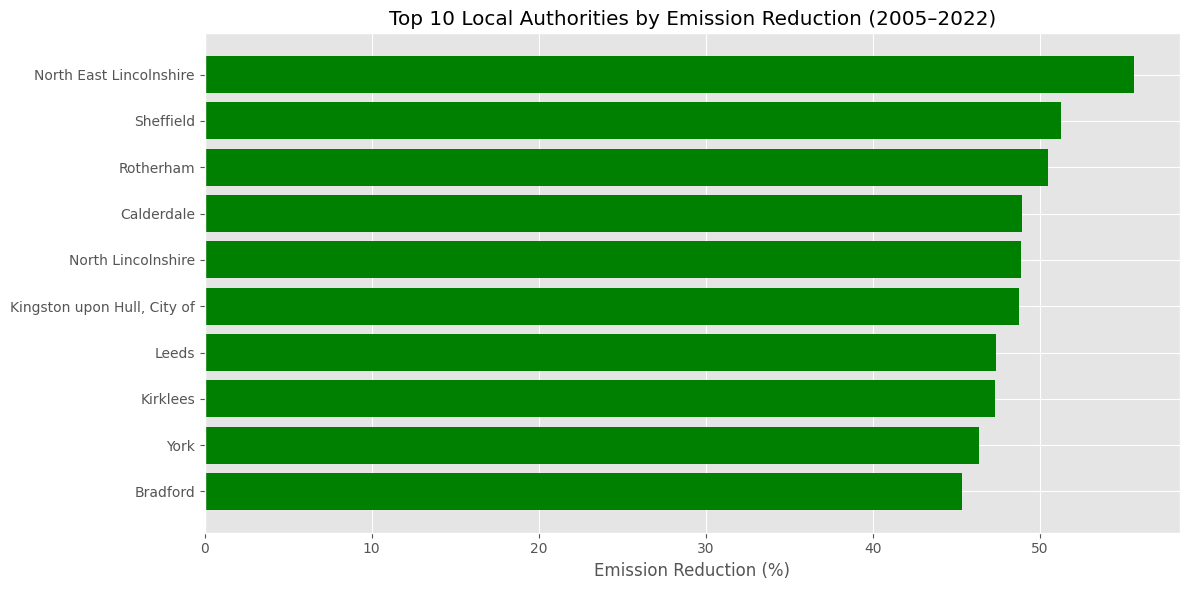

In [81]:

#  Pivot emissions over years
pivot_df = agg_df.pivot(index='Calendar Year', columns='Local Authority', values='CO2 emissions within the scope of influence of LAs (kt CO2)')

#  Calculate % reduction from 2005 to 2022
emission_reduction = (
    (pivot_df.loc[2005] - pivot_df.loc[2022]) / pivot_df.loc[2005] * 100
).reset_index()

emission_reduction.columns = ['Local Authority', 'Emission Reduction (%)']
emission_reduction_sorted = emission_reduction.sort_values(by='Emission Reduction (%)', ascending=False)

#  View top reducers
print("Top 10 Authorities by Emission Reduction (2005–2022):")
print(emission_reduction_sorted.head(10))


top10 = emission_reduction_sorted.head(10)
plt.figure(figsize=(12,6))
plt.barh(top10['Local Authority'], top10['Emission Reduction (%)'], color='green')
plt.xlabel('Emission Reduction (%)')
plt.title('Top 10 Local Authorities by Emission Reduction (2005–2022)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [82]:
!pip install prophet tqdm

import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

# STEP 1: Aggregate emissions per Local Authority per Year
agg_df = df1.groupby(['Local Authority', 'Calendar Year'])[
    'CO2 emissions within the scope of influence of LAs (kt CO2)'
].sum().reset_index()

# STEP 2: Forecast with Prophet (trend tuning + evaluation)
results = []

for la in tqdm(agg_df['Local Authority'].unique(), desc="Evaluating Local Authorities"):
    la_df = agg_df[agg_df['Local Authority'] == la].copy()

    if la_df.shape[0] < 8:
        continue

    # Prepare for Prophet
    prophet_df = la_df.rename(columns={
        'Calendar Year': 'ds',
        'CO2 emissions within the scope of influence of LAs (kt CO2)': 'y'
    })

    prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y', errors='coerce')
    prophet_df.dropna(subset=['ds', 'y'], inplace=True)

    try:
        # Setup model with more changepoints and full trend detection
        model = Prophet(
            yearly_seasonality=True,
            changepoint_range=1.0,
            n_changepoints=min(15, len(prophet_df) - 2)
        )

        model.fit(prophet_df[prophet_df['ds'].dt.year <= 2020])

    except Exception as e:
        print(f"Skipping {la} due to fit error: {e}")
        continue

    # Forecast 2 years ahead (2021–2022)
    future = model.make_future_dataframe(periods=2, freq='YS')
    forecast = model.predict(future)
    forecast['year'] = forecast['ds'].dt.year

    # Get actuals for 2021–2022
    actuals = la_df[la_df['Calendar Year'].isin([2021, 2022])]
    actuals = actuals.rename(columns={
        'Calendar Year': 'year',
        'CO2 emissions within the scope of influence of LAs (kt CO2)': 'y'
    })

    # Merge actual and forecast
    merged = pd.merge(forecast[['year', 'yhat']], actuals, on='year', how='inner')

    if merged.shape[0] < 2:
        continue

    # Evaluation metrics
    y_true = merged['y'].values
    y_pred = merged['yhat'].values
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    results.append({
        'Local Authority': la,
        'MAE (2021–22)': round(mae, 2),
        'RMSE (2021–22)': round(rmse, 2),
        'MAPE (%) (2021–22)': round(mape, 2),
        'R² (2021–22)': round(r2, 4)
    })

# STEP 3: Create results DataFrame
metrics_df = pd.DataFrame(results)
metrics_df = metrics_df.sort_values(by='R² (2021–22)', ascending=False).reset_index(drop=True)

# Display top 15
metrics_df.head(15)


Evaluating Local Authorities:   0%|          | 0/15 [00:00<?, ?it/s]INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp7d1_22/_75u_ori.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp7d1_22/im0zxjt3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77683', 'data', 'file=/tmp/tmpqp7d1_22/_75u_ori.json', 'init=/tmp/tmpqp7d1_22/im0zxjt3.json', 'output', 'file=/tmp/tmpqp7d1_22/prophet_modelcz4_d6ky/prophet_model-20250411094112.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:41:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:41:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstan

,Local Authority,MAE (2021–22),RMSE (2021–22),MAPE (%) (2021–22),R² (2021–22)
0,Rotherham,9.86,10.14,0.95,0.9332
1,Calderdale,21.76,26.04,2.83,0.5608
2,York,17.16,20.98,2.23,0.4682
3,Bradford,63.13,79.16,3.24,0.3805
4,Leeds,76.68,84.36,2.71,0.2890
5,Barnsley,29.40,38.36,2.85,0.1892
6,Kirklees,50.27,70.56,3.19,0.1719
7,"Kingston upon Hull, City of",33.56,35.15,3.34,0.0449
8,Sheffield,62.80,63.72,3.40,-0.0241
9,East Riding of Yorkshire,55.72,73.28,3.04,-0.0563


In [83]:
# Visualise actual vs predicted for 2019–2022
def plot_recent_mismatch(la_name):
    la_df = agg_df[agg_df['Local Authority'] == la_name].sort_values('Calendar Year')
    la_df['ds'] = pd.to_datetime(la_df['Calendar Year'], format='%Y')
    la_df = la_df.rename(columns={'CO2 emissions within the scope of influence of LAs (kt CO2)': 'y'})

    model = Prophet()
    model.fit(la_df[['ds', 'y']])
    future = model.make_future_dataframe(periods=0)  # Just till 2022
    forecast = model.predict(future)

    recent = forecast[forecast['ds'].dt.year >= 2020]
    actual_recent = la_df[la_df['ds'].dt.year >= 2020]

    plt.figure(figsize=(10, 4))
    plt.plot(actual_recent['ds'], actual_recent['y'], label='Actual', marker='o', color='black')
    plt.plot(recent['ds'], recent['yhat'], label='Predicted', marker='x', color='green')
    plt.fill_between(recent['ds'], recent['yhat_lower'], recent['yhat_upper'], color='lightgreen', alpha=0.3)
    plt.title(f"Recent Trend Mismatch for {la_name}")
    plt.ylabel("Emissions (kt CO₂e)")
    plt.xlabel("Year")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp7d1_22/bgmok6h7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp7d1_22/kroqqa76.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60319', 'data', 'file=/tmp/tmpqp7d1_22/bgmok6h7.json', 'init=/tmp/tmpqp7d1_22/kroqqa76.json', 'output', 'file=/tmp/tmpqp7d1_22/prophet_modelbdyztugx/prophet_model-20250411094118.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:41:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:41:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:

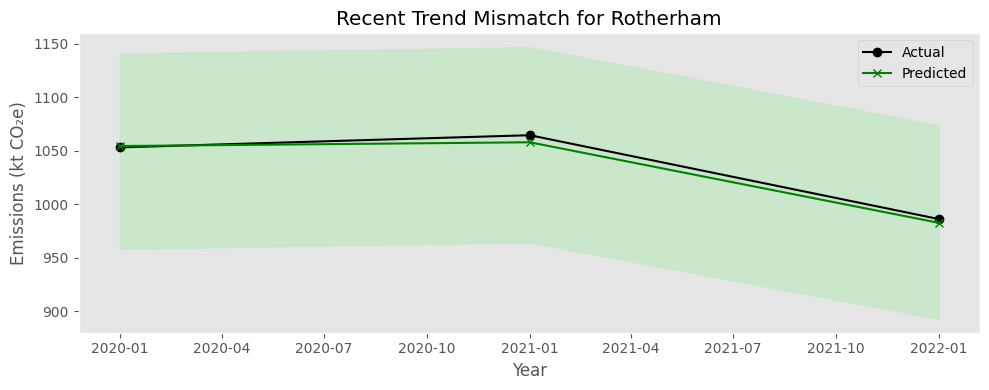

In [84]:
plot_recent_mismatch('Rotherham')

In [85]:
from scipy.stats import ttest_rel
import pandas as pd

t_test_results = []

for la in agg_df['Local Authority'].unique():
    la_df = agg_df[agg_df['Local Authority'] == la].copy()
    if la_df.shape[0] < 8:
        continue

    prophet_df = la_df.rename(columns={'Calendar Year': 'ds', 'CO2 emissions within the scope of influence of LAs (kt CO2)': 'y'})
    prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')

    model = Prophet()
    model.fit(prophet_df[prophet_df['ds'].dt.year <= 2020])  # Train up to 2020

    future = model.make_future_dataframe(periods=2, freq='YS')  # Forecast 2021–2022
    forecast = model.predict(future)

    # Merge actual and predicted
    merged = pd.merge(
        forecast[['ds', 'yhat']],
        prophet_df[prophet_df['ds'].dt.year.isin([2021, 2022])],
        on='ds',
        how='inner'
    )

    if merged.shape[0] < 2:
        continue

    y_true = merged['y'].values
    y_pred = merged['yhat'].values

    t_stat, p_value = ttest_rel(y_true, y_pred)

    t_test_results.append({
        'Local Authority': la,
        't-statistic': round(t_stat, 4),
        'p-value': round(p_value, 4),
        'Significant? (p < 0.05)': 'Yes' if p_value < 0.05 else 'No'
    })

# Display as DataFrame
# Display as a table in Colab
t_test_df = pd.DataFrame(t_test_results).sort_values(by='p-value')
t_test_df.head(15)  # Or just: display(t_test_df)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp7d1_22/mnp9fv3j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp7d1_22/s7vtscc_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72432', 'data', 'file=/tmp/tmpqp7d1_22/mnp9fv3j.json', 'init=/tmp/tmpqp7d1_22/s7vtscc_.json', 'output', 'file=/tmp/tmpqp7d1_22/prophet_modelihbhypr7/prophet_model-20250411094118.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:41:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:41:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:

,Local Authority,t-statistic,p-value,Significant? (p < 0.05)
8,North East Lincolnshire,15.2351,0.0417,Yes
12,Sheffield,5.8183,0.1084,No
9,North Lincolnshire,5.5062,0.1144,No
11,Rotherham,4.2050,0.1486,No
5,"Kingston upon Hull, City of",3.2206,0.1917,No
10,North Yorkshire,2.7921,0.2189,No
13,Wakefield,2.4183,0.2496,No
7,Leeds,2.1829,0.2735,No
3,Doncaster,1.9492,0.3018,No
14,York,1.4496,0.3844,No


In [86]:
!pip install prophet
import pandas as pd
from prophet import Prophet
from tqdm import tqdm

# STEP 1: Aggregate emissions per Local Authority per Year
agg_df = df1.groupby(['Local Authority', 'Calendar Year'])['CO2 emissions within the scope of influence of LAs (kt CO2)'].sum().reset_index()

# STEP 2: Forecast + classify
forecast_results = []

for la in agg_df['Local Authority'].unique():
    la_df = agg_df[agg_df['Local Authority'] == la]

    if la_df.shape[0] < 5:
        continue

    prophet_df = la_df.rename(columns={'Calendar Year': 'ds', 'CO2 emissions within the scope of influence of LAs (kt CO2)': 'y'})
    prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')

    try:
        model = Prophet()
        model.fit(prophet_df)

        future = model.make_future_dataframe(periods=28, freq='YS')  # Force full years
        forecast = model.predict(future)
        forecast['year'] = forecast['ds'].dt.year
        forecast_2050 = forecast[forecast['year'] == 2050]

        if not forecast_2050.empty:
            yhat_2050 = forecast_2050.iloc[0]['yhat']
            net_zero = "Yes" if yhat_2050 <= 0 else "No"

            forecast_results.append({
                'Local Authority': la,
                'Predicted Emissions 2050 (kt CO2e)': round(yhat_2050, 2),
                'On Track for Net Zero': net_zero
            })

    except Exception as e:
        print(f" Failed for {la}: {e}")
        continue

# STEP 3: Results DataFrame
forecast_df = pd.DataFrame(forecast_results).sort_values(by='Predicted Emissions 2050 (kt CO2e)')
forecast_df.reset_index(drop=True, inplace=True)
forecast_df.head(15)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp7d1_22/g8qg64rz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp7d1_22/8sujjw9b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48840', 'data', 'file=/tmp/tmpqp7d1_22/g8qg64rz.json', 'init=/tmp/tmpqp7d1_22/8sujjw9b.json', 'output', 'file=/tmp/tmpqp7d1_22/prophet_model5f45fgrw/prophet_model-20250411094124.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:41:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:41:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:

,Local Authority,Predicted Emissions 2050 (kt CO2e),On Track for Net Zero
0,Leeds,-1472.54,Yes
1,Sheffield,-1457.55,Yes
2,North East Lincolnshire,-1031.70,Yes
3,North Lincolnshire,-644.15,Yes
4,Bradford,-639.58,Yes
5,Kirklees,-606.58,Yes
6,"Kingston upon Hull, City of",-514.64,Yes
7,Calderdale,-512.01,Yes
8,Rotherham,-358.35,Yes
9,Wakefield,-281.60,Yes


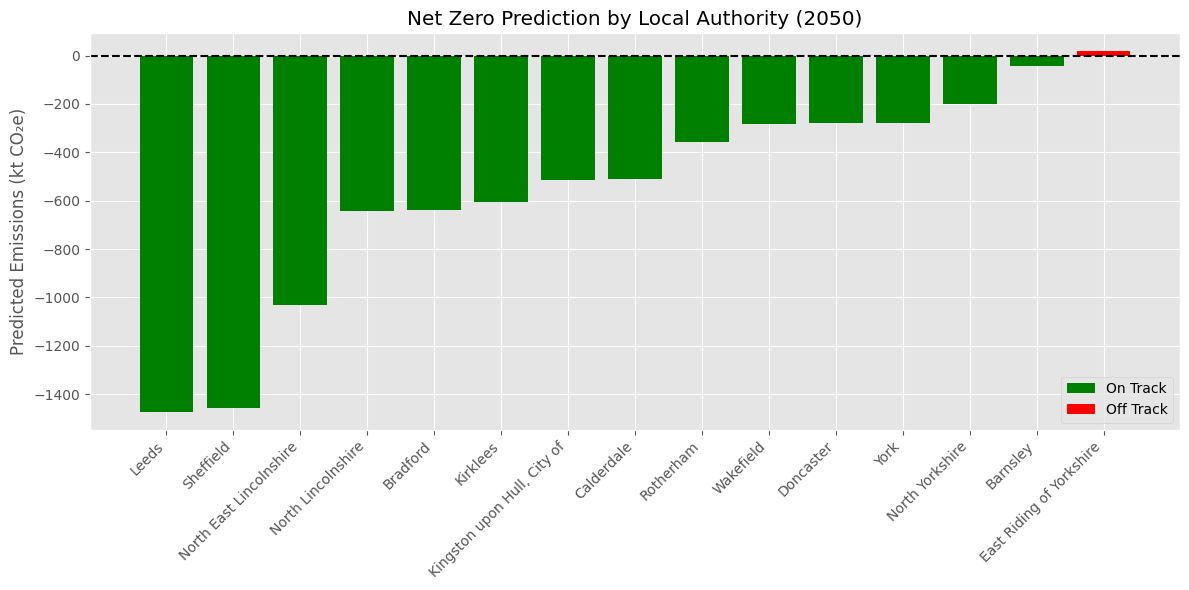

In [87]:
import matplotlib.pyplot as plt

# Split by classification
on_track = forecast_df[forecast_df['On Track for Net Zero'] == "Yes"]
off_track = forecast_df[forecast_df['On Track for Net Zero'] == "No"]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(on_track['Local Authority'], on_track['Predicted Emissions 2050 (kt CO2e)'], label='On Track', color='green')
plt.bar(off_track['Local Authority'], off_track['Predicted Emissions 2050 (kt CO2e)'], label='Off Track', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Predicted Emissions (kt CO₂e)')
plt.title('Net Zero Prediction by Local Authority (2050)')
plt.legend()
plt.tight_layout()
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp7d1_22/0unrc9vy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp7d1_22/5k_bolyv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6308', 'data', 'file=/tmp/tmpqp7d1_22/0unrc9vy.json', 'init=/tmp/tmpqp7d1_22/5k_bolyv.json', 'output', 'file=/tmp/tmpqp7d1_22/prophet_modelvo_fjgli/prophet_model-20250411094127.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:41:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:41:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

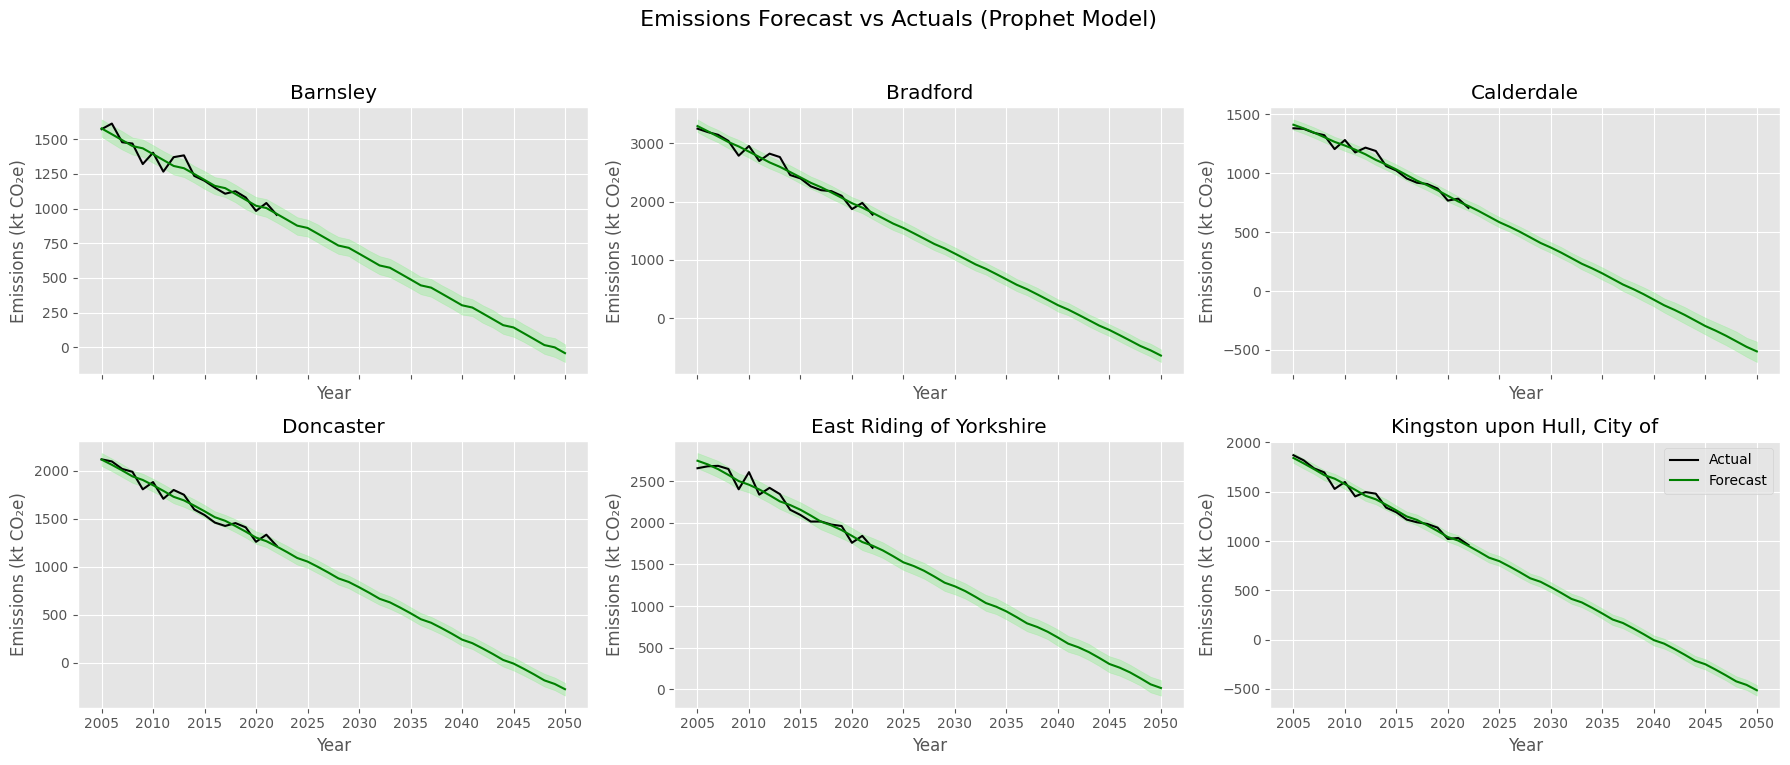

In [88]:
import matplotlib.pyplot as plt
from prophet import Prophet

# Aggregate emissions
agg_df = df1.groupby(['Local Authority', 'Calendar Year'])['CO2 emissions within the scope of influence of LAs (kt CO2)'].sum().reset_index()

# Choose LAs with enough years of data
valid_las = agg_df['Local Authority'].value_counts()
valid_las = valid_las[valid_las >= 10].index.tolist()
selected_las = valid_las[:6]  # Pick top 6 for visual

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharex=True)
axes = axes.flatten()

for i, la in enumerate(selected_las):
    la_df = agg_df[agg_df['Local Authority'] == la].sort_values('Calendar Year')
    la_df['ds'] = pd.to_datetime(la_df['Calendar Year'], format='%Y')
    la_df = la_df.rename(columns={'CO2 emissions within the scope of influence of LAs (kt CO2)': 'y'})

    try:
        model = Prophet()
        model.fit(la_df[['ds', 'y']])
        future = model.make_future_dataframe(periods=28, freq='YS')
        forecast = model.predict(future)

        ax = axes[i]
        ax.plot(la_df['ds'], la_df['y'], label='Actual', color='black')
        ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='green')
        ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightgreen', alpha=0.4)
        ax.set_title(f"{la}")
        ax.set_xlabel("Year")
        ax.set_ylabel("Emissions (kt CO₂e)")

    except Exception:
        axes[i].set_title(f"{la} (Error)")
        continue

fig.suptitle(" Emissions Forecast vs Actuals (Prophet Model)", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.legend()
plt.show()
